In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
print('Done Importing')

Done Importing


In [41]:
data = pd.read_csv('Type CSVs/meta_Art Classical.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

    index      id          author                               media  \
0  1556.0  57y1go  ZigguratofDoom      http://i.imgur.com/s5TJAZK.jpg   
1  1386.0  61tirk    the-ryback92  https://i.redd.it/i6wjph8yhzny.jpg   
2  2800.0  6akqkh      bern_trees  https://i.redd.it/ak2mimrv0wwy.jpg   
3  2007.0  6ldzxu          JF_112      http://i.imgur.com/labpM1u.jpg   
4   643.0  6pfrsw     LegendaryVD  https://i.redd.it/b79g2q09eqbz.png   

   upvotes            date           type  
0   4031.0  17-10-16 15:52  Art Classical  
1   7053.0  27-03-17 17:18  Art Classical  
2    841.0  11-05-17 15:14  Art Classical  
3  75999.0  05-07-17 13:26  Art Classical  
4  18644.0  25-07-17 12:23  Art Classical  

 Data Types:
index      float64
id          object
author      object
media       object
upvotes    float64
date        object
type        object
dtype: object


In [44]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%y %H:%M')

In [45]:
data = pd.read_csv('Type CSVs/meta_Art Classical.csv', parse_dates=['date'], index_col='date', date_parser=dateparse, skipinitialspace=True, usecols=['date','upvotes'])
print (data.head())
data.index

TypeError: strptime() argument 1 must be str, not float

In [37]:
moddata = np.asarray(data)

In [38]:
from statsmodels.tsa.ar_model import AR
# contrived dataset
# data = [x for x in range(0, 101, 5)]

# fit model
model = AR(moddata)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data) + 50)

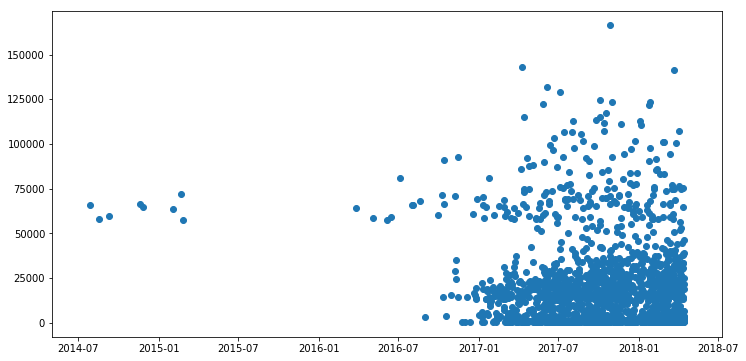

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(data.index, data.upvotes)

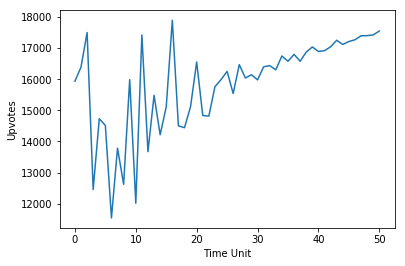

In [40]:
plt.xlabel('Time Unit')
plt.ylabel('Upvotes')
plt.plot(yhat)
#plt.savefig('Predicted_Upvotes-Time.png', format='png', dpi=300)